In [100]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix,precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# data load

In [10]:
train_df=pd.read_csv('movie_genre_train_data.txt',sep=':::',engine='python',names=['id','title','genre','summary'])
test_df=pd.read_csv('movie_genre_test_data.txt',sep=':::',engine='python',names=['id','title','genre','summary'])

In [14]:
train_df.isnull().sum()

id         0
title      0
genre      0
summary    0
dtype: int64

In [16]:
test_df.isnull().sum()

id         0
title      0
genre      0
summary    0
dtype: int64

In [18]:
label=LabelEncoder()

In [20]:
train_y=label.fit_transform(train_df['genre'])
test_y=label.transform(test_df['genre'])

In [24]:
def is_list_of_dicts(val):
    try:
        parsed = ast.literal_eval(val)
        return isinstance(parsed, list) and all(isinstance(i, dict) for i in parsed)
    except Exception:
        return False

for col in train_df.columns:
    if train_df[col].apply(is_list_of_dicts).any():
        print(f"Column '{col}' contains list-of-dict strings")


In [26]:
test_df.isnull().sum()

id         0
title      0
genre      0
summary    0
dtype: int64

In [30]:
print(train_df["genre"].value_counts())

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


In [32]:
train_df['genre'][0]

' drama '

In [34]:
train_df['summary'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

# data preprocessing

In [46]:
class data_preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        df['tags'] = df['title']*2 + df['summary']
        df['tags'] = df['tags'].str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)
        df['tags'] = df['tags'].str.lower()
        text = df['tags'].tolist()
        return text




# final model with pipeline

In [51]:
pipe=Pipeline([
    ('preprocessor',data_preprocessing()),
    ('tfidf',TfidfVectorizer(stop_words='english',max_features=2000,ngram_range=(1,2))),    # tf idf for vector tockenizer
    ('model',LogisticRegression(max_iter=1000))
     ])

# model structure 

In [57]:
pipe.fit(train_df,train_y)

Pipeline(steps=[('preprocessor', data_preprocessing()),
                ('tfidf',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('model', LogisticRegression(max_iter=1000))])

In [61]:
y_pred=pipe.predict(test_df)

In [92]:
y_proba=pipe.predict_proba(test_df)

In [72]:
auc1=accuracy_score(test_y,y_pred)
print(auc1)


0.5679335793357934


# dump ml model

In [103]:
import pickle

In [105]:
with open ('movie_27_genre_classifier.pkl','wb')as f:
    pickle.dump(pipe,f)

# model performance visual 

In [75]:
genre_class=2     # which class want see 

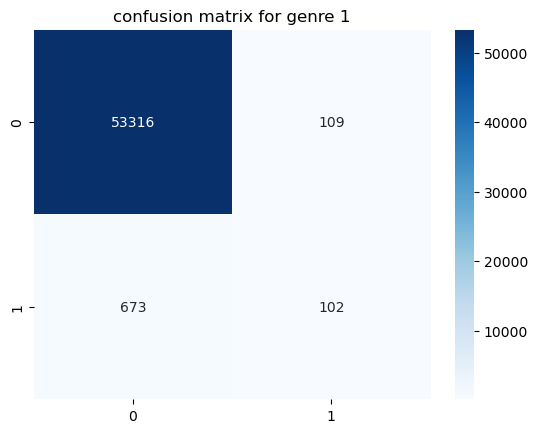

In [77]:
cm=multilabel_confusion_matrix(test_y,y_pred)


#plotin heat map 
sns.heatmap(cm[genre_class],fmt='d',annot=True,cmap='Blues')
plt.title('confusion matrix for genre 1')
plt.show()


# classification report

C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


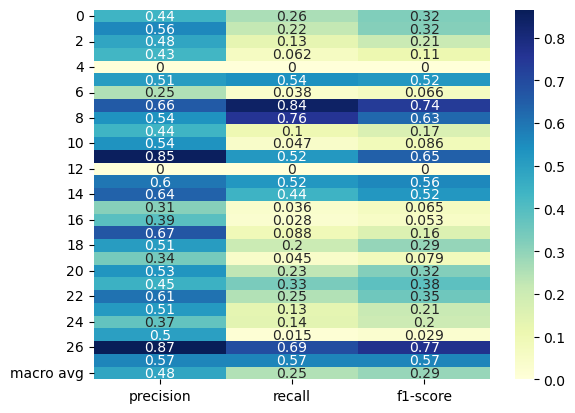

In [80]:
report = classification_report(test_y, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.show()

In [84]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.26      0.32      1314
           1       0.56      0.22      0.32       590
           2       0.48      0.13      0.21       775
           3       0.43      0.06      0.11       498
           4       0.00      0.00      0.00       264
           5       0.51      0.54      0.52      7446
           6       0.25      0.04      0.07       505
           7       0.66      0.84      0.74     13096
           8       0.54      0.76      0.63     13612
           9       0.44      0.10      0.17       783
          10       0.54      0.05      0.09       322
          11       0.85      0.52      0.65       193
          12       0.00      0.00      0.00       243
          13       0.60      0.52      0.56      2204
          14       0.64      0.44      0.52       731
          15       0.31      0.04      0.06       276
          16       0.39      0.03      0.05       318
          17       0.67    

C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


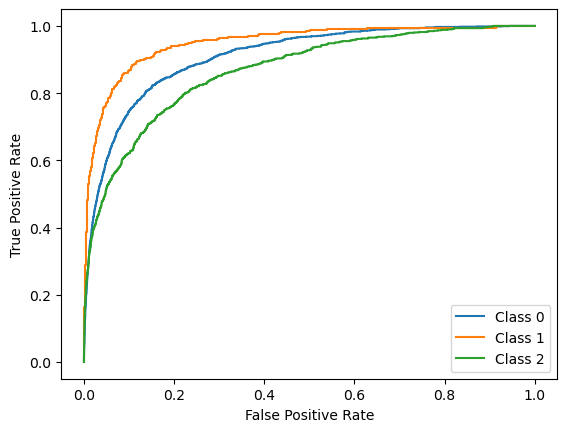

In [98]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(test_y, classes=[0,1,2])  # adjust classes
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()